# Importations

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

import joblib

# Exploratory data analysis

### Read the data set and visualize the 5th first rows

In [2]:
data_iris = pd.read_csv("...")
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Description of our data 

In [3]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Some graphs to see the repartition of species according to the size of petal and sepal

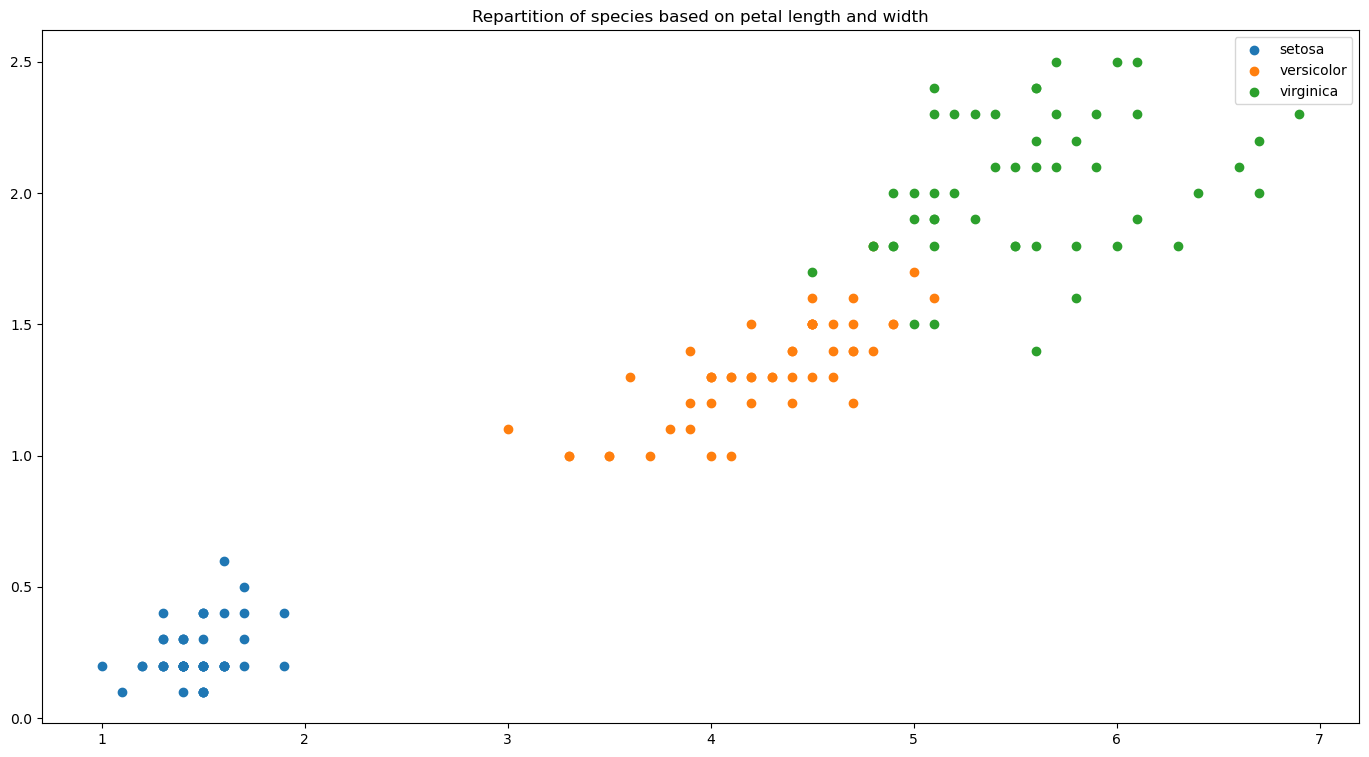

In [4]:
plt.figure(figsize=(17,9))
plt.title('Repartition of species based on petal length and width')

setosa = data_iris[data_iris['species'] == 'Iris-setosa']
versicolor = data_iris[data_iris['species'] == 'Iris-versicolor']
virginica = data_iris[data_iris['species']=='Iris-virginica']

plt.scatter(setosa['petal_length'],setosa['petal_width'],label = 'setosa')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],label = 'versicolor')
plt.scatter(virginica['petal_length'],virginica['petal_width'],label = 'virginica')
plt.legend()
plt.show()

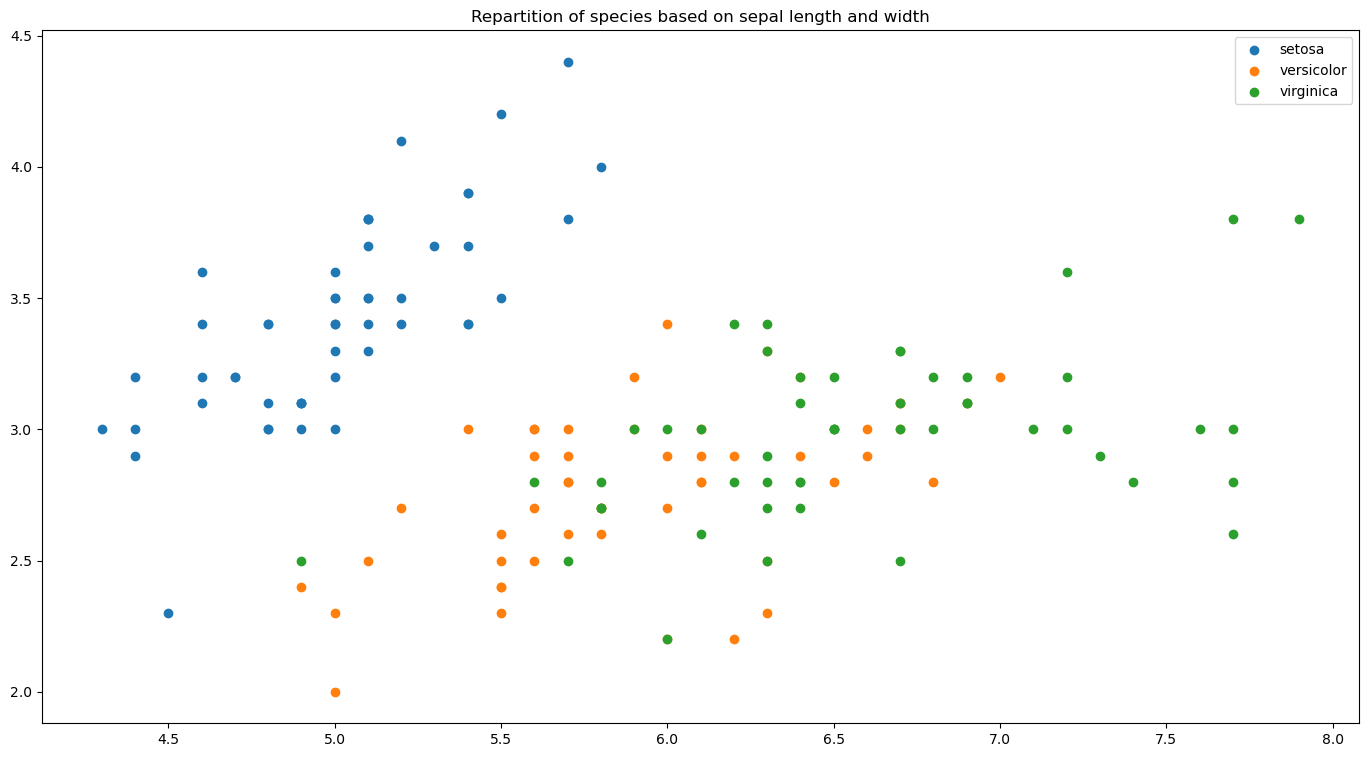

In [5]:
plt.figure(figsize=(17,9))
plt.title('Repartition of species based on sepal length and width')

plt.scatter(setosa['sepal_length'],setosa['sepal_width'],label = 'setosa')
plt.scatter(versicolor['sepal_length'],versicolor['sepal_width'],label = 'versicolor')
plt.scatter(virginica['sepal_length'],virginica['sepal_width'],label = 'virginica')
plt.legend()

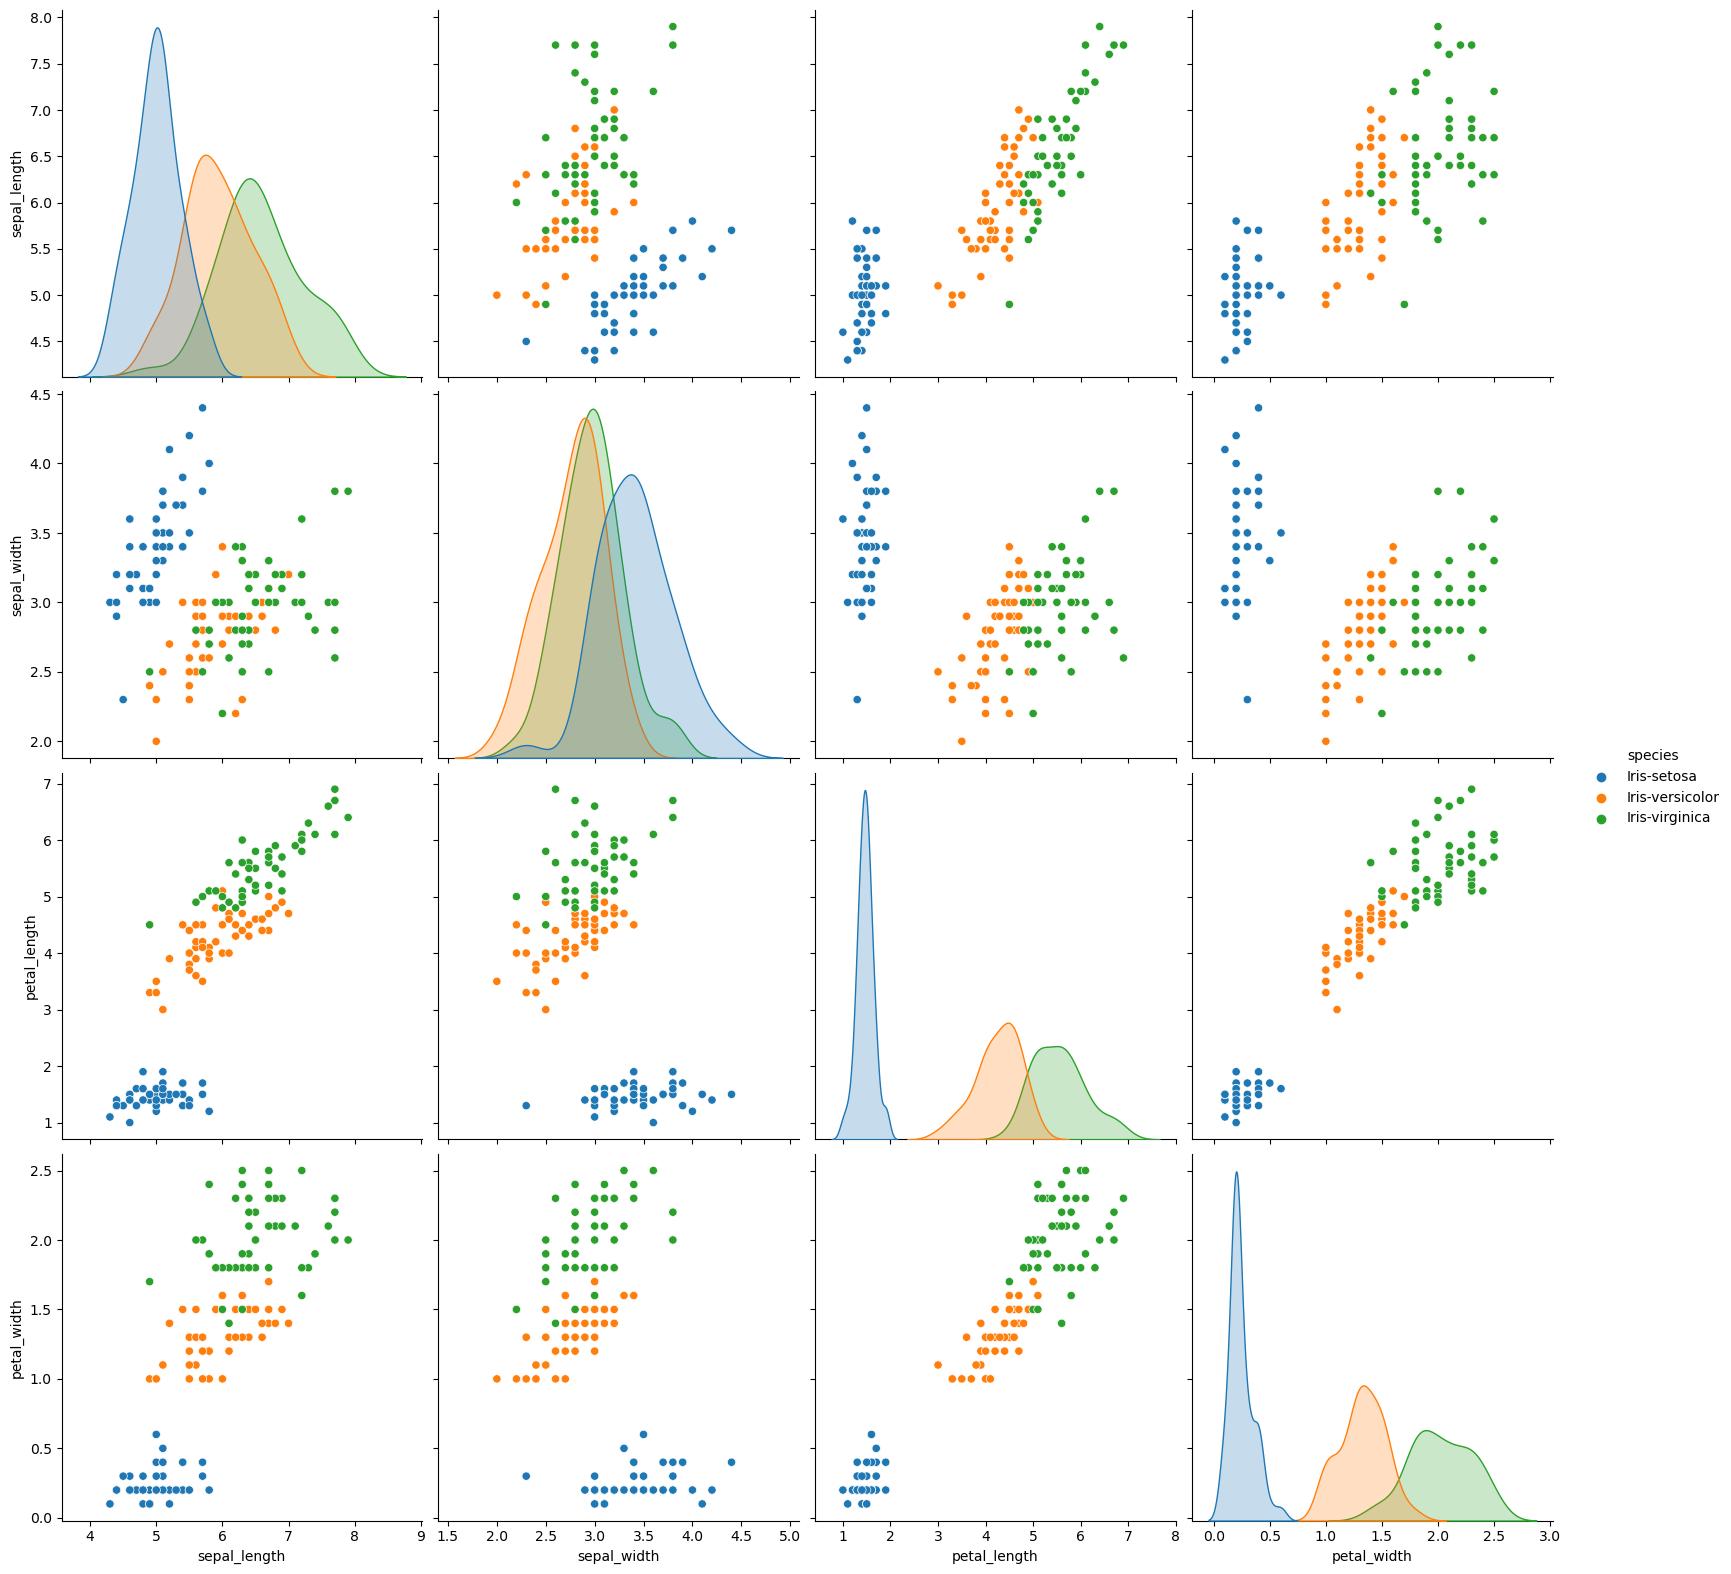

In [6]:
sns.pairplot(data_iris,hue='species',height=4)

We can see from theses graphs that we can easyly seperate the first species (setosa) from the others. Maybe our model will have problems differentiating versicolor and virginica. We will see that with the results

Now with this graph we ca see the correlation between the parameters 

C:\Users\cassi\AppData\Local\Temp\ipykernel_32460\3176087372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_iris.corr(),annot=True)


[]

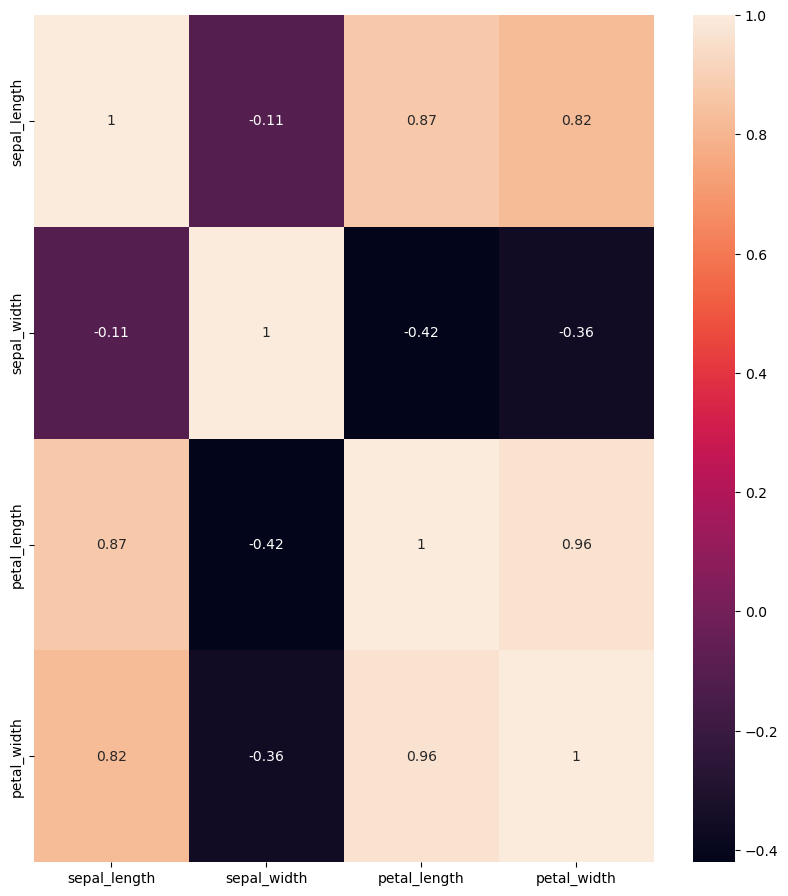

In [7]:
plt.figure(figsize=(10,11))
sns.heatmap(data_iris.corr(),annot=True)
plt.plot()

Here we can see that the most correlated parameters are : 
 - petal_length and petal_width
 - petal_length and sepal_length
 - sepal_width and petal_width


In [8]:
data_iris.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

Here we have all the details of our different species

# Clean the data if needed

In [9]:
print("Missing values distribution: ")
print(data_iris.isnull().mean())

Missing values distribution: 
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


We can see that there is no missing values so we don't have to clean the data

# Split the data into train-test or train-val-test
The three species will respectively be encoded with 1, 2 or 3

In [10]:
print("Column datatypes: ")
print(data_iris.dtypes)

"""
Here we can see that species is a type object. 
We need to encode each species by a number so that we can train our model
"""

Column datatypes: 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


'\nHere we can see that species is a type object. \nWe need to encode each species by a number so that we can train our model\n'

In [11]:
df_species = data_iris['species'].to_numpy()
for i in range(0,len(df_species)) : 
    if df_species[i] == 'Iris-setosa' : 
        df_species[i] = 1
    elif df_species[i] == 'Iris-versicolor' : 
        df_species[i] = 2
    elif df_species[i] == 'Iris-virginica' : 
        df_species[i] = 3
target = pd.Series(df_species)
target = target.astype('int')

feature = data_iris.drop(['species'],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size = 0.75)

*We now want to normalize the data before fitting it into the marchine learning model.*

In [12]:
"""
    StandardScaler() --> We standardize feature by removing the mean and scaling to unit variance
    fit_transform() --> This methode is used to fit the StandardScaler to the training data
    and then transform the data by centering and scaling it. 
    transform() --> We apply the same scaling data to the testing data set so that it's transformed in the same way as the training data
    We have now normalized the data and improved the performance of our machine learning model
"""
st_x = StandardScaler() 
x_train = st_x.fit_transform(x_train) 
x_test=st_x.transform(x_test)

*Training the model and change the hyper parameter*

In [13]:
"""
    This methode is used to change a hyper parameter on our machine learning model : n_estimator
    n_estimator is the number of trees built by the algorithm before averaging the products
    it trains the model and then returns the prediction
"""

def hyper_parameter_modification(n_estimators):
    classifier = RandomForestClassifier(n_estimators,criterion="entropy")
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    return y_pred

*Some methodes to help us after*

In [14]:
""" matrice_plt summary : 
    This method plots the confusion matrix of our model
"""
def matrice_plt(cm,y_pred):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    text = 'Matrice de confusion with ' + str(i) + ' as hyper parameter'
    plt.title(text)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    plt.ylabel('Real values')
    plt.xlabel('Prediction')
    plt.show()
    print(type(y_pred))
    print(type(y_test))
    
    
""" compare_the_two summary : 
    I used this fonction to see were are the differences between the predicted values and the real values
"""
def compare_the_two(y_pred):
    y_test_array = y_test.values
    unique_values, counts = np.unique(y_pred, return_counts=True)
    print("For the prediction :")
    for value, count in zip(unique_values, counts):
        print(f"{value} : {count}")
    unique_values, counts = np.unique(y_test_array, return_counts=True)
    print("The real values : ")
    for value, count in zip(unique_values, counts):
        print(f"{value} : {count}")
    print("__________________")


"""pourcentage summary : 
    This fonction gives us the pourcentage of accurate values when we test our model
    It can also print the number of errors the model as made when we tested it
"""
def pourcentage(y_pred):
    sum = 0
    y_test_array = y_test.values
    for i in range(0,len(y_pred)):
        if(y_pred[i]==y_test_array[i]):
            sum =sum+1
    prct = sum*100/38
    #print(38-sum," errors")
    return prct

### Main part of the training and testing 

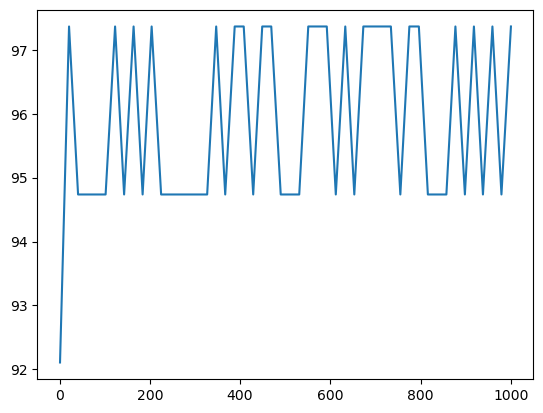

In [15]:
""" 
    We first initalize an arrays for the pourcentage of accurate values when we test the model
    
    Then we choose to change our hyper parameter from 1 to 1000 using a numpy array called n 
    
    Then for every value of n we train the model and make the prediction for the testing part 
    Every time we calculate and add to the array the pourcentage of accurate value 
    
    Then we want to plot plot the pourcentage of accurate values according to the number of n_estimator
    
    We can see that the more we have trees the more efficient our model is
"""
pourcentage_array = []

n = np.linspace(1,1000).astype(int)
for i in n:
    y_pred = hyper_parameter_modification(i)
    cm=confusion_matrix(y_test,y_pred)
    pourcentage_array.append(pourcentage(y_pred)) 
    #matrice_plt(cm,y_pred) #If you want to see the confusion matrix for every hyper parameter
    #compare_the_two(y_pred) #If you want to compare the values from the prediction to the accurate values 

pourcentage_array = np.array(pourcentage_array)
    
plt.plot(n,pourcentage_array)


In [16]:
iris = load_iris()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
final_model = RandomForestClassifier(**best_params)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


# Saving the Model with the hyper parameter as 1000

In [17]:
model = RandomForestClassifier(1000,criterion="entropy")
model.fit(x_train,y_train)

joblib.dump(model, 'model_file.pkl')

['model_file.pkl']